In [158]:
import os
import json
import re
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [165]:
def avg_series(series):
    return [sum(i)/len(i) for i in series]

PosixPath('/Users/peaceforlives/Documents/Projects/covid_tweets/results/TYPE_5000')

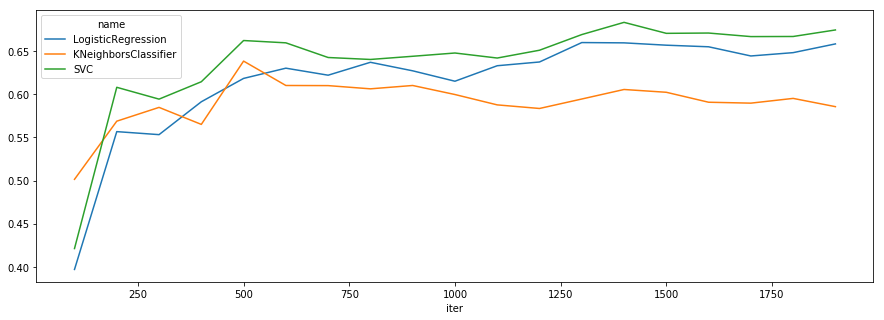

In [172]:
target = 'TYPE'
n_tweets = str(5000)
ROOT = Path(r'/Users/peaceforlives/Documents/Projects/covid_tweets')
RESULTS = Path.joinpath(ROOT, 'results', n_tweets, target+'_'+n_tweets)
PLOTS = Path.joinpath(ROOT, 'results','plots')

all_files = [i for i in list(RESULTS.iterdir()) if '.json' in i.suffix ]
all_files.sort()

full_df = pd.DataFrame()
for i in all_files:
    each_df = pd.read_json(i, lines=True)
    each_df['iter'] =  re.findall(r'\d+', i.stem)[0]
    each_df['iter'] = each_df['iter'].astype(int)
    full_df = full_df.append(each_df)

df = full_df.copy()
df = full_df.drop(['model', 'size'], axis=1)

df.iloc[:,1:7] = df.iloc[:,1:7].apply(avg_series)

train = df.groupby(['name', 'iter'])['f1_train'].sum().unstack('name').reset_index()
train = train.loc[:,['NB' not in i for i in train.columns]]
train['set'] = 'train'

valid = df.groupby(['name', 'iter'])['f1_valid'].sum().unstack('name').reset_index()
valid = valid.loc[:,['NB' not in i for i in valid.columns]]
valid['set'] = 'valid'

plot_df = valid.append(train)
plot_df.reset_index(inplace=True)
plot_df.drop('index', axis=1, inplace=True)
plot_df.set_index('iter', inplace=True)


cols=['iter','LogisticRegression', 'KNeighborsClassifier','SVC']
valid[cols].plot(x='iter', kind="line")
plt.savefig(Path.joinpath(PLOTS, target+'increasingtrainsize'+n_tweets+'.pdf'), dpi=300)

set
train    AxesSubplot(0.125,0.125;0.775x0.755)
valid    AxesSubplot(0.125,0.125;0.775x0.755)
Name: LogisticRegression, dtype: object

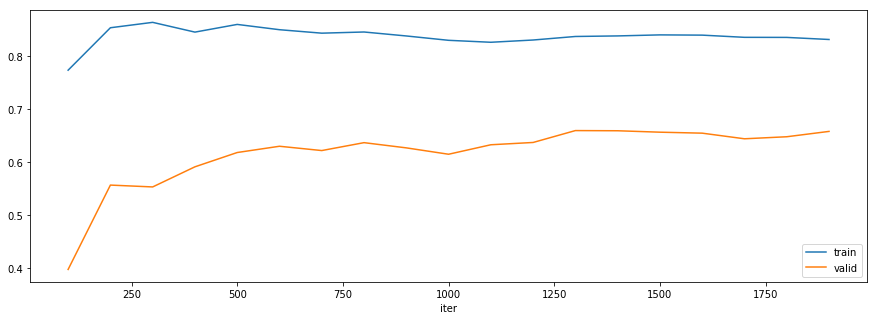

In [161]:
plot_df.groupby('set')['LogisticRegression'].plot(legend=True)

set
train    AxesSubplot(0.125,0.125;0.775x0.755)
valid    AxesSubplot(0.125,0.125;0.775x0.755)
Name: SVC, dtype: object

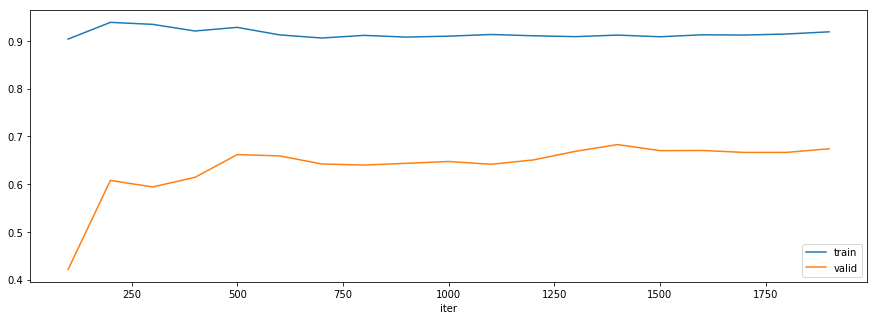

In [162]:
plot_df.groupby('set')['SVC'].plot(legend=True)

set
train    AxesSubplot(0.125,0.125;0.775x0.755)
valid    AxesSubplot(0.125,0.125;0.775x0.755)
Name: KNeighborsClassifier, dtype: object

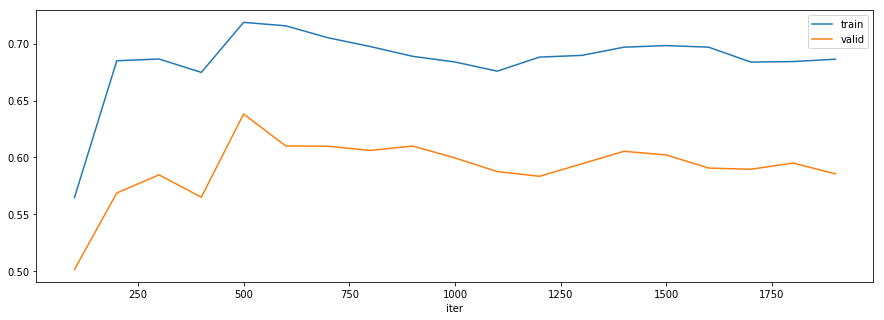

In [163]:
plot_df.groupby('set')['KNeighborsClassifier'].plot(legend=True)

In [164]:
cols=['iter','LogisticRegression', 'LogisticRegression (TruncatedSVD)','SGDClassifier', 'SGDClassifier (TruncatedSVD)', 'SVC']
train[cols].plot(x='iter', kind="line")

KeyError: "['SGDClassifier', 'LogisticRegression (TruncatedSVD)', 'SGDClassifier (TruncatedSVD)'] not in index"

In [114]:
valid[valid.iter<=3000].max()

name
iter                                     3000
LogisticRegression                   0.732806
LogisticRegression (TruncatedSVD)    0.730822
SGDClassifier                        0.737724
SGDClassifier (TruncatedSVD)         0.745629
SVC                                  0.748509
set                                     valid
dtype: object

In [121]:
valid.max()

name
iter                                     4991
LogisticRegression                   0.737813
LogisticRegression (TruncatedSVD)    0.733536
SGDClassifier                        0.737724
SGDClassifier (TruncatedSVD)         0.745629
SVC                                  0.748509
set                                     valid
dtype: object